In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install mlxtend seaborn

1. Association Rule Generation from Transaction Data

Part (c) after Part (a) and Part (b)

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
file_path = r"/content/drive/MyDrive/Rowan University 23-25/Spring '24/Data Mining I/Grocery_Items_24.csv"
df = pd.read_csv(file_path)
transactions = []
for _, row in df.iterrows():
    transactions.append([item for item in row if pd.notna(item)])
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
min_support = 0.01
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)
min_confidence = 0.1
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=min_confidence)
print("\nAssociation Rules:")
print(rules)



Association Rules:
          antecedents         consequents  antecedent support  \
0        (rolls/buns)  (other vegetables)            0.111875   
1        (whole milk)  (other vegetables)            0.156000   
2  (other vegetables)        (whole milk)            0.122750   
3        (rolls/buns)        (whole milk)            0.111875   
4              (soda)        (whole milk)            0.093625   

   consequent support   support  confidence      lift  leverage  conviction  \
0             0.12275  0.011250    0.100559  0.819215 -0.002483    0.975328   
1             0.12275  0.016125    0.103365  0.842081 -0.003024    0.978381   
2             0.15600  0.016125    0.131365  0.842081 -0.003024    0.971639   
3             0.15600  0.013500    0.120670  0.773528 -0.003952    0.959822   
4             0.15600  0.011375    0.121495  0.778816 -0.003231    0.960723   

   zhangs_metric  
0      -0.199025  
1      -0.181802  
2      -0.176125  
3      -0.247927  
4      -0.238580  


Part (d)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Minimum Support Value: 0.001, Minimum Confidence Threshold: 0.05
Number of Association Rules: 511
===
Minimum Support Value: 0.001, Minimum Confidence Threshold: 0.075
Number of Association Rules: 294
===
Minimum Support Value: 0.001, Minimum Confidence Threshold: 0.1
Number of Association Rules: 169
===
Minimum Support Value: 0.005, Minimum Confidence Threshold: 0.05
Number of Association Rules: 64
===
Minimum Support Value: 0.005, Minimum Confidence Threshold: 0.075
Number of Association Rules: 43
===
Minimum Support Value: 0.005, Minimum Confidence Threshold: 0.1
Number of Association Rules: 27
===
Minimum Support Value: 0.01, Minimum Confidence Threshold: 0.05
Number of Association Rules: 8
===
Minimum Support Value: 0.01, Minimum Confidence Threshold: 0.075
Number of Association Rules: 7
===
Minimum Support Value: 0.01, Minimum Confidence Threshold: 0.1
Number of Association Rules: 5
===


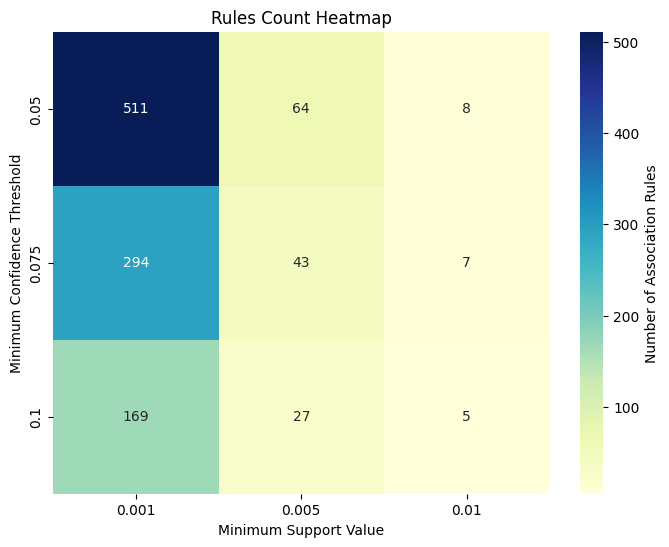

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

min_support_values = [0.001, 0.005, 0.01]
min_confidence_thresholds = [0.05, 0.075, 0.1]

count_results = []
for minimum_support in min_support_values:
    for minimum_confidence in min_confidence_thresholds:

        frequent_itemsets = apriori(df_encoded, min_support=minimum_support, use_colnames=True)

        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=minimum_confidence)

        num_rules = len(rules)

        count_results.append({
            'Minimum Support Value': minimum_support,
            'Minimum Confidence Threshold': minimum_confidence,
            'Count': num_rules
        })


        print(f"Minimum Support Value: {minimum_support}, Minimum Confidence Threshold: {minimum_confidence}")
        print(f"Number of Association Rules: {num_rules}")
        print("===")


count_df = pd.DataFrame(count_results)


heatmap_data = count_df.pivot_table(
    index="Minimum Confidence Threshold",
    columns="Minimum Support Value",
    values="Count"
)

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Number of Association Rules'})
plt.title("Rules Count Heatmap")
plt.xlabel("Minimum Support Value")
plt.ylabel("Minimum Confidence Threshold")
plt.show()


Part (e)

In [ ]:
from sklearn.model_selection import train_test_split


df_subset1, df_subset2 = train_test_split(df_encoded, test_size=0.5, random_state=42)


min_support_subset = 0.005
min_confidence_subset = 0.075

def extract_association_rules(subset):
    frequent_itemsets = apriori(subset, min_support=min_support_subset, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence_subset)
    return rules

rules_subset1 = extract_association_rules(df_subset1)
print("Association Rules for Subset 1:")
print(rules_subset1)

rules_subset2 = extract_association_rules(df_subset2)
print("\nAssociation Rules for Subset 2:")
print(rules_subset2)

common_rules = set(rules_subset1.index).intersection(set(rules_subset2.index))

print("\nCommon Association Rules:")
if common_rules:
    for rule_index in common_rules:
        print(rule_index)
else:
    print("No common association rules between the subsets.")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Association Rules for Subset 1:
           antecedents         consequents  antecedent support  \
0       (bottled beer)        (whole milk)             0.04975   
1       (bottled beer)            (yogurt)             0.04975   
2      (bottled water)  (other vegetables)             0.05975   
3      (bottled water)        (whole milk)             0.05975   
4        (canned beer)        (whole milk)             0.04650   
5       (citrus fruit)  (other vegetables)             0.05675   
6       (citrus fruit)        (whole milk)             0.05675   
7      (domestic eggs)        (whole milk)             0.03575   
8        (frankfurter)  (other vegetables)             0.03900   
9          (pip fruit)  (other vegetables)             0.05275   
10        (rolls/buns)  (other vegetables)             0.11225   
11  (other vegetables)        (rolls/buns)             0.11800   
12           (sausage)  (other vegetables)             0.05950   
13              (soda)  (other vegetables)  

2. Image Classification using CNN

Construction of CNN and plotting of the graph

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(16, activation='relu'),
    layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 8)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1352)              0         
                                                                 
 dense (Dense)               (None, 16)                21648     
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                                 
Total params: 21796 (85.14 KB)
Trainable params: 21796 (85.14 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 126, 126, 8)       224       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 63, 63, 8)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 31752)             0         
                                                                 
 dense_14 (Dense)            (None, 16)                508048    
                                                                 
 dense_15 (Dense)            (None, 4)                 68        
                                                                 
Total params: 508340 (1.94 MB)
Trainable params: 508340 (1.94 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

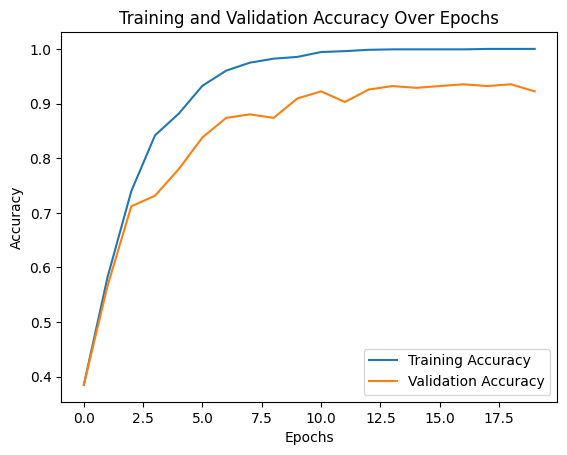

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


dataset_path = r'/content/drive/MyDrive/ResizedImages'

def load_images_and_labels(directory, target_size=(128, 128)):
    image_data = []
    label_data = []
    label_mapping = {
        'n02089078-black-and-tan_coonhound': 0,
        'n02091831-Saluki': 1,
        'n02092002-Scottish_deerhound': 2,
        'n02095314-wire-haired_fox_terrier': 3
    }

    for folder_name in os.listdir(directory):
        folder_path = os.path.join(directory, folder_name)
        if os.path.isdir(folder_path) and folder_name in label_mapping:
            label = folder_name
            encoded_label = label_mapping[label]
            for filename in os.listdir(folder_path):
                img_path = os.path.join(folder_path, filename)
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, target_size)  # Resize image to target size
                img = img / 255.0
                image_data.append(img)
                label_data.append(encoded_label)

    return np.array(image_data), np.array(label_data)


images_data, labels_data = load_images_and_labels(dataset_path)


categorical_labels = to_categorical(labels_data, num_classes=4)


X_train_data, X_val_data, y_train_labels, y_val_labels = train_test_split(images_data, categorical_labels, test_size=0.2, random_state=42)

model_classifier = Sequential()
model_classifier.add(Conv2D(8, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model_classifier.add(MaxPooling2D(pool_size=(2, 2)))
model_classifier.add(Flatten())
model_classifier.add(Dense(16, activation='relu'))
model_classifier.add(Dense(4, activation='softmax'))


model_classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_classifier.summary()


batch_size_train = 32
epochs_train = 20
history_train = model_classifier.fit(X_train_data, y_train_labels, batch_size=batch_size_train, epochs=epochs_train, validation_data=(X_val_data, y_val_labels))


plt.plot(history_train.history['accuracy'], label='Training Accuracy')
plt.plot(history_train.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Based on Rowan Banner ID - Last digit is 6 - Experiment (b)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 98, 98, 4)         112       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 49, 49, 4)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 9604)              0         
                                                                 
 dense_10 (Dense)            (None, 16)                153680    
                                                                 
 dense_11 (Dense)            (None, 4)                 68        
                                                                 
Total params: 153860 (601.02 KB)
Trainable params: 153860 (601.02 KB)
Non-trainable params: 0 (0.00 Byte)
______________

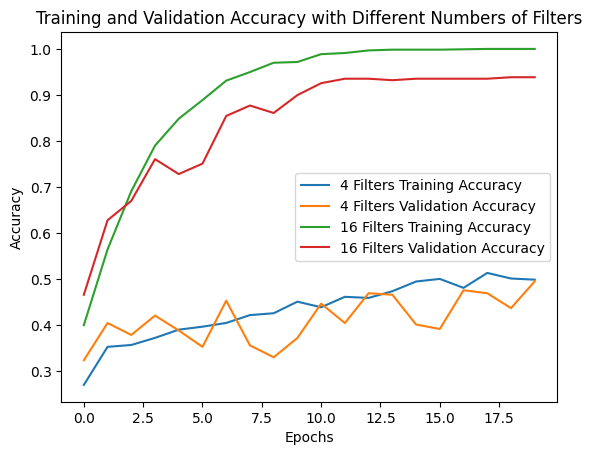

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define the dataset path
dataset_path = r'/content/drive/MyDrive/ResizedImages'

def load_images_and_labels(directory, target_size=(100, 100)):
    image_data = []
    label_data = []
    label_mapping = {
        'n02089078-black-and-tan_coonhound': 0,
        'n02091831-Saluki': 1,
        'n02092002-Scottish_deerhound': 2,
        'n02095314-wire-haired_fox_terrier': 3
    }

    for folder_name in os.listdir(directory):
        folder_path = os.path.join(directory, folder_name)
        if os.path.isdir(folder_path) and folder_name in label_mapping:
            label = folder_name
            encoded_label = label_mapping[label]
            for filename in os.listdir(folder_path):
                img_path = os.path.join(folder_path, filename)
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, target_size)  # Resize image to target size
                img = img / 255.0
                image_data.append(img)
                label_data.append(encoded_label)

    return np.array(image_data), np.array(label_data)


images_data, labels_data = load_images_and_labels(dataset_path)


categorical_labels = to_categorical(labels_data, num_classes=4)


X_train_data, X_val_data, y_train_labels, y_val_labels = train_test_split(images_data, categorical_labels, test_size=0.2, random_state=42)

# Define the model with 4 filters
model_4filters = Sequential()
model_4filters.add(Conv2D(4, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model_4filters.add(MaxPooling2D(pool_size=(2, 2)))
model_4filters.add(Flatten())
model_4filters.add(Dense(16, activation='relu'))
model_4filters.add(Dense(4, activation='softmax'))


model_4filters.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_4filters.summary()


batch_size_train = 32
epochs_train = 20
history_4filters = model_4filters.fit(X_train_data, y_train_labels, batch_size=batch_size_train, epochs=epochs_train, validation_data=(X_val_data, y_val_labels))


# Define the model with 16 filters
model_16filters = Sequential()
model_16filters.add(Conv2D(16, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model_16filters.add(MaxPooling2D(pool_size=(2, 2)))
model_16filters.add(Flatten())
model_16filters.add(Dense(16, activation='relu'))
model_16filters.add(Dense(4, activation='softmax'))

model_16filters.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_16filters.summary()


history_16filters = model_16filters.fit(X_train_data, y_train_labels, batch_size=batch_size_train, epochs=epochs_train, validation_data=(X_val_data, y_val_labels))


# Plot the learning curves for the model with 4 filters
plt.plot(history_4filters.history['accuracy'], label='4 Filters Training Accuracy')
plt.plot(history_4filters.history['val_accuracy'], label='4 Filters Validation Accuracy')

# Plot the learning curves for the model with 16 filters
plt.plot(history_16filters.history['accuracy'], label='16 Filters Training Accuracy')
plt.plot(history_16filters.history['val_accuracy'], label='16 Filters Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy with Different Numbers of Filters')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


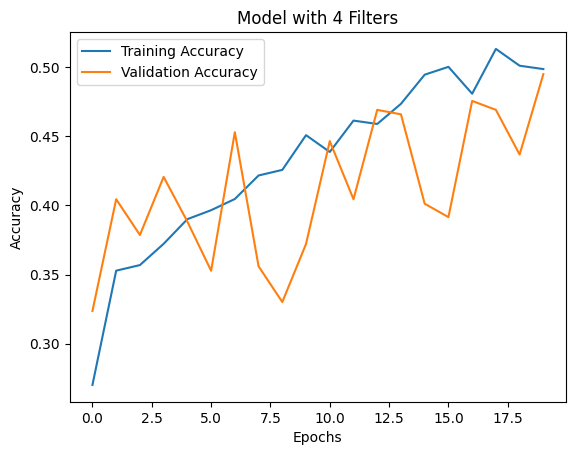

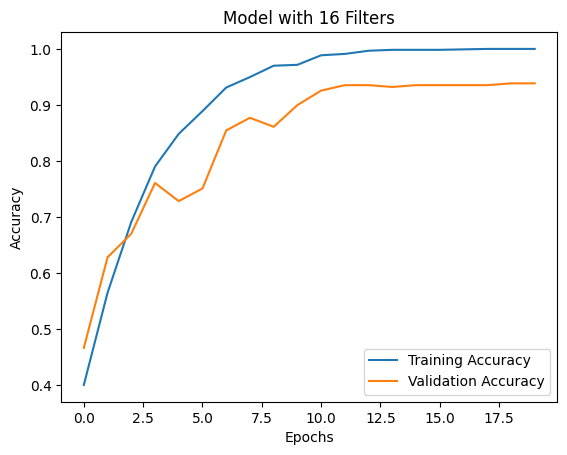

In [ ]:
import matplotlib.pyplot as plt

# Function to plot learning curves
def plot_learning_curves(history, title):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Plot learning curves for model with 4 filters
plot_learning_curves(history_4filters, "Model with 4 Filters")

# Plot learning curves for model with 16 filters
plot_learning_curves(history_16filters, "Model with 16 Filters")
